# Exercise 1
## Simen Nygard, MTFYMA

$\newcommand{norm}[1]{\lVert #1 \rVert }$,


## Problem 1
* a) 

CGM succeeds because each residual is arranged to be orthogonal to all previous residuals. If this can be done, the method runs out of orthogonal directions in which to look, and must reach a $0$-residual in at most $n$ steps. This is achieved by choosing $p_k$ pairwise $A$-conjugate (which leads to them being mutually $A$-conjugate).
By definition 
\begin{equation}\label{eq:pk}
p_{k+1}=r_{k+1}-\beta_{k}p_k
\end{equation}

In order to ensure that the next residual is orthogonal to all past residuals, $a_k$ is chosen so that $r_{k+1}$ is orthogonal to $p_k$:
\begin{equation}\label{eq:rk}
r_{k+1}=r_k-a_kAp_k
\end{equation}

$$0=p_k^Tr_{k+1}=p_k^Tr_k-\alpha_kp_k^TAp_k$$

which gives 
\begin{equation}\label{eq:ak1}
\alpha_k=\frac{p_k^Tr_k}{p_k^TAp_k}
\end{equation}

Continuing in this fashion $p_{k-1}^Tr_k=0=r_k^Tp_{k-1}$. From  equation \eqref{eq:pk} we have $p_k-r_k=\beta_kp_{k-1}$. Multiplication by $r_k^T$ then gives $r_k^Tp_k-r_k^Tr_k=0$, which lets us rewrite equation $\eqref{eq:ak1}$ as 

\begin{equation}\label{eq:ak2}
\alpha_k=\frac{r_k^Tr_k}{p_k^TAp_k}=\frac{\norm{r_k}_2^2}{p_k^TAp_k}
\end{equation}

The expression for $\beta_k$ results from wanting the $p_k$ to be pairwise $A$-conjugate:

$$0=p_k^TAp_{k+1}=p_k^TAr_{k+1}-\beta_kp_k^TAp_k$$

\begin{equation}\label{eq:bk1}
\beta_k=\frac{p_k^T A r_{k+1}}{p_k^TA p_k}
\end{equation}

Using the orthogonality of the $r_k$ we find that
\begin{equation}\label{eq:}
r_{k+1}^Tr_{k+1}=r_{k+1}^T r_k - \frac{r_k^T r_k}{p_k^T A p_k} r_{k+1}^T A p_k= - \frac{r_k^Tr_k}{p_k^TAp_k}r_{k+1}^T Ap_k
\end{equation}

This shows that \eqref{eq:bk1} can be rewritten as 

\begin{equation}\label{eq:bk2}
\beta_k= - \frac{r_{k+1}^T r_{k+1} }{r_k^T r_k} = - \frac{ \norm{r_{k+1}}_2^2 }{\norm{r_k}_2^2}
\end{equation}


* b)  

From equation \eqref{eq:rk} we have 

$$r_{k+1}=r_k-\alpha_k A \left( r_k-\beta_{k-1}p_{k-1} \right) = r_k- \alpha_k A r_k + \alpha_k \beta_{k-1} A p_{k-1} 
= r_k- \alpha_k A r_k + \frac{ \alpha_k \beta_{k-1} } { \alpha_{k-1} } \left( r_{k-1} -r_k \right)
$$
Thus $$r_{k+1}= \left( 1- \frac{ \alpha_k \beta_{k-1} } { \alpha_{k-1} } \right)r_k -\alpha_kAr_k + 
\frac{ \alpha_k \beta_{k-1} } { \alpha_{k-1}} r_{k-1}$$ 
and we get

$$Ar_k=-\frac{1}{\alpha_k}r_{k+1}+ \left(\frac{1}{\alpha_k} - \frac{\beta_{k-1}}{\alpha_{k-1}} \right) r_k + \frac{\beta_{k-1}}{\alpha_{k-1}} r_{k-1}$$


## Problem 2

Let $A=\mathcal{Penta}\left[1,-2,8,-2,1 \right] \in \mathbb{R^{n \times n}}$ be a symmetric, strictly diagonally dominant matrix. Since the diagonal entries are positive, A is positive definite, and the assosiated quadratic form $x^TAx$ will be convex. This enables the CG method as a way of minimizing the energy associated with the system $Ax=b$, which in this case will be equivalent to finding the exact solution of the system. Moreover, this solution will be found in at most $n$ iterations. 

We now examine how the number of iterations of CGM varies with increasing pertubations, $m$, of the diagonal of $A$, for various sizes $n \in [10,20,..60]$. This is done by iterating $(A+mI)x=b$ for $m \in [0,1,..1000]$. Since the method is expected to be quite accurate in the current case, a small forward error $\norm{x_{k+1}-x_k}_\infty \le 10^{-15}$ is used as a stopping criterion. 

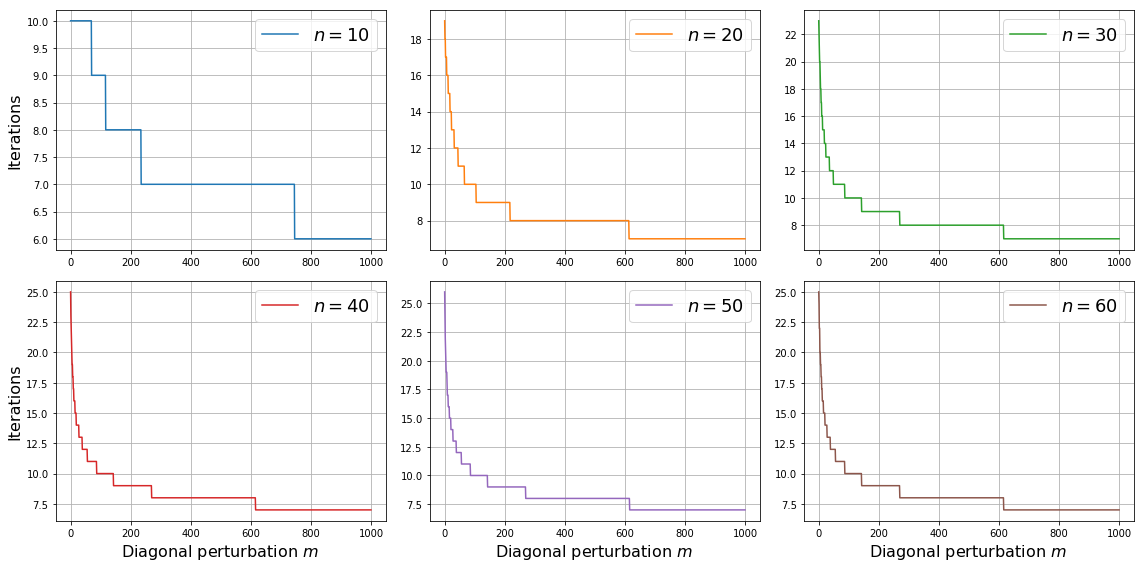

In [31]:
import numpy as np, scipy.sparse as ss, matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams.update({'axes.grid': True, 'legend.fontsize': 18, 'legend.handlelength': 2,
                     'axes.labelsize': 16, 'axes.titlesize': 18, 'figure.figsize': (16, 8)})

def simulation(N, M):
    K = np.empty((len(N), len(M)))
    for i, n in enumerate(N):
        A = ss.diags([1, -2, 8, -2, 1], [-2, -1, 0, 1, 2], shape=(n, n)).toarray()
        I = np.eye(n)
        b = np.random.rand(n)
        e = np.ones_like(b)
        for j, m in enumerate(M):
            k = conjugateGradient(A + m * I, b, e)
            K[i, j] = k
    return K

def conjugateGradient(A, b, x0, TOL=1E-15):  # Non-conditioned
    n = len(b)
    p = r = b - A @ x0
    
    for k in range(n):
        rdotp = r.dot(p)
        Ap = A @ p
        pAdotp = p.dot(Ap)
        alpha = rdotp / pAdotp
        x1 = x0 + alpha * p
        if np.linalg.norm(x1 - x0, np.inf) <= TOL:
            return k + 1
        x0 = x1
        r -= alpha * Ap
        beta = r.dot(Ap) / pAdotp
        p = r - beta * p
        
    return k + 1


def plotIterations(K, N, M):

    colors = rcParams['axes.prop_cycle'].by_key()['color']
    fig, axes = plt.subplots(2, 3)
    
    for i in range(2):
        axes[i,0].set_ylabel('Iterations')
        
        for j in range(3):
            k = i*3 + j
            axes[i, j].plot(M, K[k], label=r'$n=%d$' % N[k], color=colors[k])
            axes[i, j].legend(loc='best')
            axes[1,j].set_xlabel(r'Diagonal perturbation $m$ ')    
    
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    N = np.arange(10, 70, 10)
    M = np.linspace(0, 1000, 1001)
    plotIterations(simulation(N, M), N, M)


As the figure shows, the number of iterations decreases rapidly, with a rate that increases as $n$ increases, as the coefficient matrix becomes increasingly diagonally dominant. For small $n$ the CGM iterates the full dimension of the unperturbed system, but for larger $n$, the method only uses a fraction of this number.